In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import random
from keras import layers, models, optimizers

In [2]:
df=pd.read_csv('train_labels.csv')

In [3]:
df.head()

,id,label
0,10,cat
1,18,cat
2,22,cat
3,27,cat
4,34,cat


In [4]:
len(df)

8000

In [5]:
img_dir="C:\\Users\\Dell\\OneDrive\\Desktop\\ml\\PreRequists\\Task_3\\train_data"
ids = df["id"].tolist()
labels = df["label"].tolist()

In [6]:
imgs = []

for img in ids:
    imgs.append(cv2.imread(os.path.join(img_dir,f"{img}.png")))

In [7]:
len(imgs)

8000

In [8]:
imgs[0]

array([[[116, 125, 125],
        [ 91, 101, 110],
        [ 83,  90, 102],
        ...,
        [214, 207, 202],
        [212, 205, 200],
        [214, 208, 202]],

       [[142, 146, 142],
        [139, 144, 146],
        [170, 172, 176],
        ...,
        [205, 201, 195],
        [209, 205, 198],
        [215, 211, 204]],

       [[183, 185, 180],
        [146, 146, 143],
        [157, 157, 156],
        ...,
        [113, 111, 122],
        [131, 128, 139],
        [150, 147, 158]],

       ...,

       [[ 41,  82, 104],
        [ 39,  80, 101],
        [ 38,  81, 101],
        ...,
        [ 67, 103, 126],
        [ 69, 103, 126],
        [ 68, 101, 125]],

       [[ 40,  81, 104],
        [ 41,  84, 105],
        [ 43,  88, 109],
        ...,
        [ 78, 113, 138],
        [ 80, 113, 137],
        [ 81, 112, 137]],

       [[ 42,  83, 105],
        [ 45,  87, 108],
        [ 50,  94, 115],
        ...,
        [ 82, 117, 143],
        [ 84, 116, 143],
        [ 86, 116, 144]]

In [9]:
lab = ["cat","dog"]
target = []
for label in labels :
    if label == "cat":
        target.append(lab.index(label))
    elif label == "dog":
        target.append(lab.index(label))

In [10]:
img_width=64
img_height = 64

In [11]:
def prepare_data(images,target):
    inp= []

    for i in range(len(target)):
        images[i]=cv2.resize(images[i], (img_width,img_height), interpolation=cv2.INTER_CUBIC)
        inp.append([images[i], target[i]])

    random.shuffle(inp) 
    x = []  
    y = []  

    for feature, tar in inp:
        x.append(feature)
        y.append(tar)
    
    x= np.array(x)
    x = x/255
    y= np.array(y)
    
    return x,y

In [12]:
x, y = prepare_data(imgs,target)

In [13]:
x[0]

array([[[0.69019608, 0.78823529, 0.89019608],
        [0.69019608, 0.78039216, 0.87843137],
        [0.68627451, 0.77254902, 0.8627451 ],
        ...,
        [0.50980392, 0.56862745, 0.57647059],
        [0.51764706, 0.57254902, 0.58431373],
        [0.52156863, 0.57647059, 0.58823529]],

       [[0.69411765, 0.78823529, 0.88627451],
        [0.69019608, 0.78039216, 0.8745098 ],
        [0.69019608, 0.76862745, 0.85490196],
        ...,
        [0.51764706, 0.57647059, 0.58431373],
        [0.52156863, 0.58039216, 0.58823529],
        [0.5254902 , 0.58039216, 0.59215686]],

       [[0.70196078, 0.78823529, 0.87843137],
        [0.69411765, 0.78039216, 0.86666667],
        [0.69019608, 0.76470588, 0.84705882],
        ...,
        [0.52941176, 0.58431373, 0.59215686],
        [0.53333333, 0.58823529, 0.6       ],
        [0.5372549 , 0.59215686, 0.60392157]],

       ...,

       [[0.62352941, 0.65490196, 0.6627451 ],
        [0.59607843, 0.63137255, 0.64313725],
        [0.55686275, 0

In [14]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                    

In [16]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [17]:
history=model.fit(x,y, epochs = 10, validation_split = 0.2, batch_size = 32)

Epoch 1/10
200/200 [==============================] - 28s 101ms/step - loss: 0.6931 - accuracy: 0.5122 - val_loss: 0.6847 - val_accuracy: 0.5938
Epoch 2/10
200/200 [==============================] - 21s 105ms/step - loss: 0.6730 - accuracy: 0.5939 - val_loss: 0.6510 - val_accuracy: 0.6413
Epoch 3/10
200/200 [==============================] - 22s 108ms/step - loss: 0.6395 - accuracy: 0.6413 - val_loss: 0.6095 - val_accuracy: 0.6750
Epoch 4/10
200/200 [==============================] - 22s 108ms/step - loss: 0.6013 - accuracy: 0.6784 - val_loss: 0.6066 - val_accuracy: 0.6744
Epoch 5/10
200/200 [==============================] - 21s 103ms/step - loss: 0.5708 - accuracy: 0.7027 - val_loss: 0.5604 - val_accuracy: 0.7056
Epoch 6/10
200/200 [==============================] - 21s 105ms/step - loss: 0.5424 - accuracy: 0.7259 - val_loss: 0.5587 - val_accuracy: 0.7031
Epoch 7/10
200/200 [==============================] - 21s 103ms/step - loss: 0.5132 - accuracy: 0.7513 - val_loss: 0.5631 - val_ac

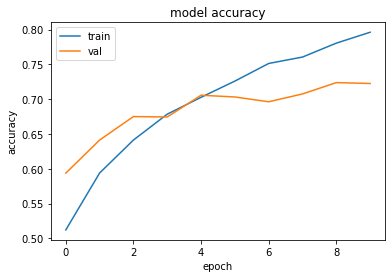

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
model.save("h5_model.h5")